<a href="https://colab.research.google.com/github/Mauricio-Fragoso-Mendoza/Ecuaciones-Diferenciales-Parciales-I/blob/main/Membrana_Vibratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La solución de la ecuación
$$\frac{\partial^2 u}{\partial t^2} = c^2\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)$$
sujeta a la condición de frontera:
$$u(0,0,t)=0, \;\;\; t>0$$
Y las condiciones iniciales:
$$u(x,y,0)=f(x,y)=0.1(4x-x^2)(2y-y^2)$$ y $$\frac{\partial u}{\partial t}|_{t=0}=g(x,y)=0$$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,y,t)=0.426050 \sum_{m=0}^{\infty} \sum_{n=0}^{\infty} \frac{1}{(2m+1)^3(2n+1)^3}  \cos\left(\frac{5\pi}{4}\sqrt{(2m+1)^2+4(2n+1)^2}\right)t \sin\frac{(2m+1)\pi x}{4} \sin\frac{(2n+1)\pi y}{2}.$$

In [ ]:
from sympy import *
from pylab import *
from sympy.plotting import plot as sympy_plot
from sympy.plotting import plot3d
x, y =symbols('x y')

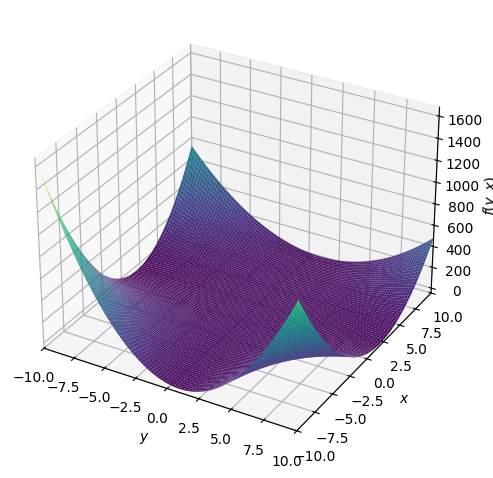

In [ ]:
f_xy=0.1*(4*x-x**2)*(2*y-y**2)
plot3d(f_xy)

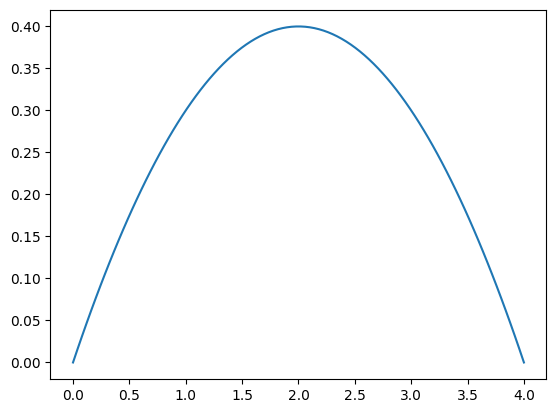

In [ ]:
def u_0_sym(x,y,N=20): # N es el número de armónicos
    sym_sum=0

x_vals = np.linspace(0, 4, 100)
y_vals = np.linspace(0, 2, 100)

f_numeric = lambdify((x, y), f_xy, 'numpy')
y_fixed = 1
f_at_y_fixed = f_numeric(x_vals, y_fixed)
plt.plot(x_vals, f_at_y_fixed, label=f'$f(x, y={y_fixed})$')

In [ ]:
plt.xlabel('$(x,y)$')
plt.ylabel('$f(x,y)$')
plt.title("Condición Inicial $f(x,y)$")
plt.xlim([-0.01, 4.1])
plt.ylim([-0.01, np.max(f_at_y_fixed) * 1.1])
plt.grid()
plt.show()

In [28]:
def u_x_y_t(x,t,N=50):
    f = zeros( (len(x),len(y),len(t)) )
def u_x_y_t(x,y,t,N=50):
    f = zeros( (len(x),len(y),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            for m in range(1,N):
                f[:,:,i] += 1/((2*m+1)**3*(2*n+1)**3)*cos(5/4*sqrt(4*(2*m+1)**2+2*(2*n+1)**2)*t[i])*sin((2*m+1)*pi*x)[:,newaxis]*sin((2*n+1)*pi*y)/4/2
    return f

In [ ]:
x = linspace(0,1,1000)
y = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_y_t(x,y,t)

In [ ]:
plot(x,U[:,0],label='$u(x,y,0)$')
plt.xlabel('$(x,y)$'); plt.ylabel('$f(x,y)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$(x,y)$'); plt.ylabel('$u(x,y,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,Y,T = np.meshgrid(x,y,t)

U = u_x_y_t(x,y,t)

plt.xlabel('$t$'); plt.ylabel('$(x,y)$');
plt.title("u(x,y,t)")
ax.plot_surface(X, Y, T, U, cmap="inferno"); #Otros colores:"viridis", "red", "inferno", "plasma"